<a href="https://colab.research.google.com/github/smfelixchoi/Deep-Learning/blob/master/RNN_Time_Series_Modeling_(RNN%2C%20LSTM%2C%20GRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN, Time Series Modeling

Recurrent Neural Network, which is usually used to predict sequential data.

Reference: https://excelsior-cjh.tistory.com/184

## 1. Generating a time-series Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
t_min, t_max = 0, 30
resolution = 0.1     #the smallest interval measurable by a scientific (especially optical) instrument

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

In [ ]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution ))

In [ ]:
n_steps = 100
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

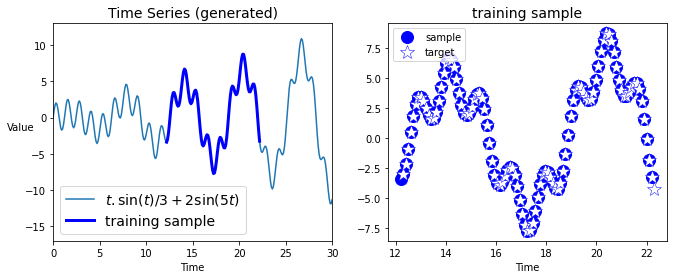

In [ ]:
plt.figure(figsize = (11, 4))
plt.subplot(121)   #1 row, 2 cols, 1st subplot
plt.title('Time Series (generated)', fontsize = 14)
plt.plot(t, time_series(t), label = r"$t.\sin(t)/3 + 2\sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label = 'training sample')
plt.legend(loc = 'lower left', fontsize = 14)
plt.axis([0, 30, -17, 13])
plt.xlabel('Time')
plt.ylabel('Value', rotation = 0)

plt.subplot(122)  #1 row, 2 cols, 2nd subplot
plt.title('training sample', fontsize = 14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'bo', markersize = 12, label = 'sample')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'w*', 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label = 'target')
plt.legend(loc = 'upper left')
plt.xlabel('Time')

plt.show()

## 2. Simple RNN modeling (Vanilla RNN)
### (1) Model 1

In [ ]:
input_data = time_series(t_instance[:-1]).reshape(-1,1,1)
target_data = time_series(t_instance[1:]).reshape(-1,1,1)

In [ ]:
model1 = models.Sequential()

model1.add(layers.SimpleRNN(1, activation = 'linear', return_sequences = False, input_shape = [1, 1]))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='mse')

history1 = model1.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [ ]:
prediction1 = model1.predict(input_data)

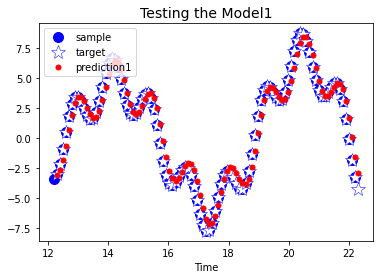

In [ ]:
plt.title("Testing the Model1", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction1, "r.", markersize=10, label="prediction1")
plt.legend(loc="upper left")    #loc: location
plt.xlabel("Time")

plt.show()

1. The model is too simple to have accurate prediction. Only 3 parameters to train.
2. How can we count the number of parameters?

In [ ]:
model1.evaluate(input_data, target_data, verbose = 1)

4/4 [==============================] - 0s 2ms/step - loss: 0.7563


0.756273090839386

### (2) Model 2

In [ ]:
model2 = models.Sequential()

model2.add(layers.SimpleRNN(100, activation = 'linear', return_sequences = False, input_shape = [1, 1]))
model2.add(layers.Dense(32, activation = 'linear'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(1))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 13,465
Trainable params: 13,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='mse')

history2 = model2.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [ ]:
prediction2 = model2.predict(input_data)

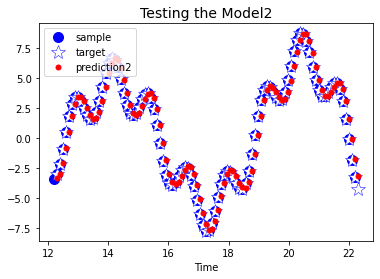

In [ ]:
plt.title("Testing the Model2", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction2, "r.", markersize=10, label="prediction2")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [ ]:
model2.evaluate(input_data, target_data, verbose = 1)

4/4 [==============================] - 0s 1ms/step - loss: 0.7232


0.7232071161270142

### (3) Model 3

In [ ]:
model3 = models.Sequential()

model3.add(layers.LSTM(100, activation = 'linear', return_sequences = False, input_shape = [1, 1]))
model3.add(layers.Dense(32, activation = 'linear'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(1, activation = 'linear'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 44,065
Trainable params: 44,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer = 'adam', loss = 'mse')

history3 = model3.fit(input_data, target_data, epochs = 1000, verbose = 0)

KeyboardInterrupt: ignored

In [ ]:
prediction3 = model3.predict(input_data)

In [ ]:
plt.title("Testing the Model3", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction3, "r.", markersize=10, label="prediction3")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [ ]:
model3.evaluate(input_data, target_data, verbose = 1)

### (4) Model 4

In [ ]:
model4 = models.Sequential()

model4.add(layers.GRU(100, activation = 'linear', return_sequences = False, reset_after = False, input_shape = [1, 1]))
model4.add(layers.Dense(32, activation = 'linear'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(1, activation = 'linear'))

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30600     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(optimizer='adam', loss='mse')

history4 = model4.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [ ]:
prediction4 = model4.predict(input_data)

In [ ]:
plt.title("Testing the Model4", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction4, "r.", markersize=14, label="prediction4")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [ ]:
model4.evaluate(input_data, target_data, verbose = 1)